In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import math
from scipy import optimize

In [4]:
df = pd.read_csv("commanderCam_2021-Aug-13_16-53-33_EYEDLC_resnet50_pupil_metricAug20shuffle1_460000.csv", header=2)
# df = pd.read_csv("C:/Users/reichler/data/Neurofeedback/2021_08_21/m400061/eyeDLC_resnet50_pupil_metricAug20shuffle1_460000.csv", header=2)
new_names = ['frame'] + [f'{cn}{n}' for n in range(8) for cn in ['x', 'y', 'l']]
df.rename(columns=dict(zip(df.columns, new_names)), inplace=True)
print(len(df))
df.head(1)

106559


,frame,x0,y0,l0,x1,y1,l1,x2,y2,l2,...,l4,x5,y5,l5,x6,y6,l6,x7,y7,l7
0,0,34.422894,28.111452,0.396381,35.132454,25.119715,0.294843,42.216553,34.248592,0.131749,...,0.780437,53.130516,43.847885,0.927822,40.634136,46.409126,0.692671,31.776569,43.730267,0.56545


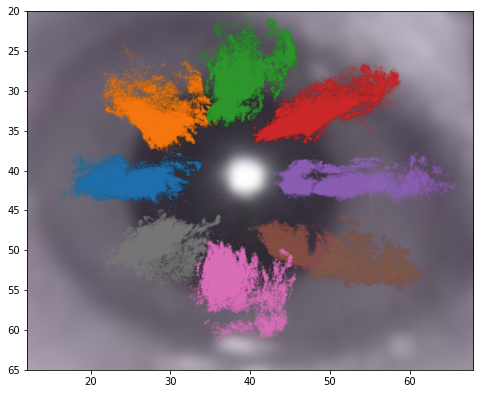

In [5]:
img = mpimg.imread('img006818.png')
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(img, interpolation="bicubic", alpha=1)
for i in range(8):
    plt.scatter(df[f'x{i}'], df[f'y{i}'], s=0.5, alpha=0.1)
ax.set_xlim(12, 68)
ax.set_ylim(65, 20);

In [6]:
X = df.iloc[:, 1::3].values
Y = df.iloc[:, 2::3].values

In [7]:
DP = (X[:, :4] - X[:, 4:])**2 + (Y[:, :4] - Y[:, 4:])**2
D = np.mean(np.sqrt(DP), axis=1)

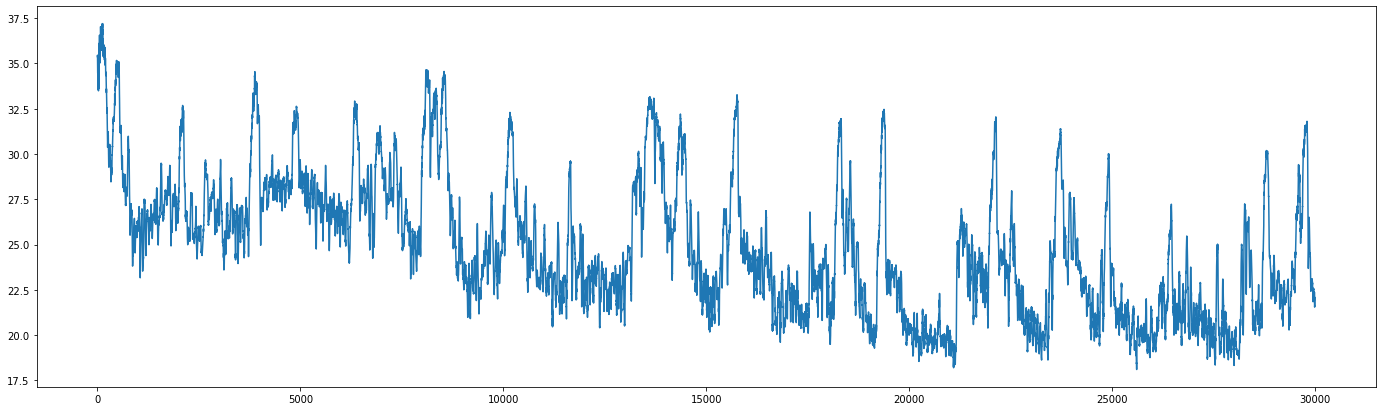

In [8]:
fig, ax = plt.subplots(figsize=(24, 7))
plt.plot(D[3:30000])

# Least Squares Circle Fitting

In [9]:
def calc_R(c):
    """ calculate the distance of each 2D points from the center c=(xc, yc) """
    return np.sqrt((x-c[0])**2 + (y-c[1])**2)

def f_2(c):
    """ calculate the algebraic distance between the 2D points and the mean circle centered at c=(xc, yc) """
    Ri = calc_R(c)
    return Ri - Ri.mean()

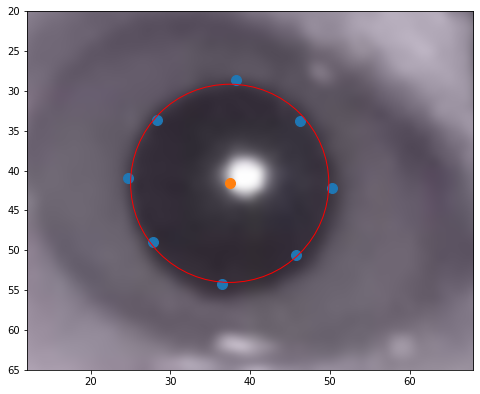

In [10]:
x = X[6818, :]
y = Y[6818, :]

x_m = np.mean(x)
y_m = np.mean(y)
center_estimate = x_m, y_m
center_2, ier = optimize.leastsq(f_2, center_estimate)

xc_2, yc_2 = center_2
Ri_2       = calc_R(center_2)
R_2        = Ri_2.mean()
residu_2   = sum((Ri_2 - R_2)**2)
residu2_2  = sum((Ri_2**2-R_2**2)**2)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(img, interpolation="bicubic", alpha=1)
circle = plt.Circle((xc_2, yc_2), R_2, color='r', fill=False)
plt.scatter(x, y, s=100, alpha=1)
plt.scatter(xc_2, yc_2, s=100, alpha=1, c='C1')
ax.add_patch(circle)
ax.set_xlim(12, 68)
ax.set_ylim(65, 20);

In [11]:
xc = np.zeros(len(X))
yc = np.zeros_like(xc)
rc = np.zeros_like(xc)
for n in range(len(X)):
    x = X[n, :]
    y = Y[n, :]

    center_estimate = np.mean(x), np.mean(y)
    center_2, ier = optimize.leastsq(f_2, center_estimate)

    xc[n], yc[n] = center_2
    rc[n] = calc_R(center_2).mean()

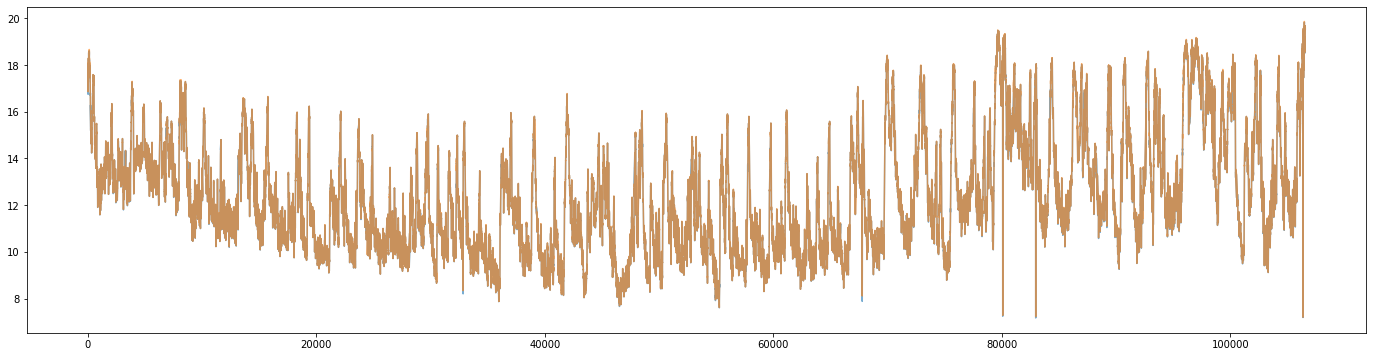

In [12]:
fig, ax = plt.subplots(figsize=(24, 6))
start, end = 3, len(X)
ax.plot(D[start:end]/2, c='C0', alpha=0.6)
ax.plot(rc[start:end], c='C1', alpha=0.6)

In [13]:
D


array([17.92559704, 17.99557201, 17.20094486, ..., 39.19467322,
       39.20099175, 39.07030282])